# `Time Series Analysis` 

### Chapter 04: Decomposing Time Series Data.

#### `- Importing Libraries`

In [27]:
# استيراد المكتبات 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# نمط التصوير البياني 
plt.style.use('ggplot')


#### `1- Additive trend and Additive seasonality time series`

* إنشاء سلسلة زمنية ذات اتجاه جمعي وموسمية جمعية


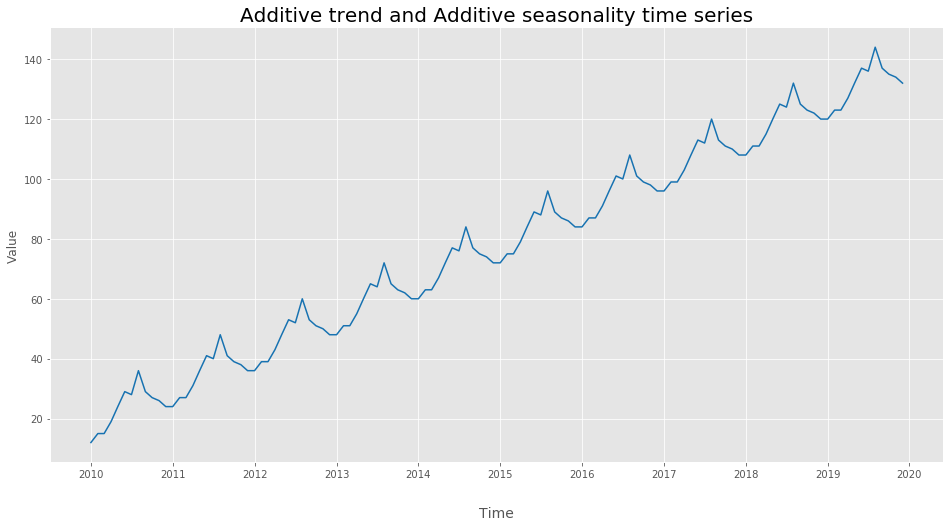

In [28]:
# إنشاء 120 نقطة (تمثل 10 * 12 شهر) أو 10 سنوات
x_range = np.arange(1, 121)

# (عدد الحدود = 12) حدود تستخدم لإضافة تأثير الموسمية
seasonal_adders = [11, 13, 12, 15, 19, 23, 21, 28, 20, 17, 15, 12]

# قيم السلسلة الزمنية
time_series = []

# تقسيم الـ 120 نقطة إلى 10 مجموعات كل مجموعة تشكل سنة
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # إضافة قيمة الاتجاه إلى قيمة الموسمية
        time_series.append(val + seasonal_adders[i])

# dataframe تحويل المعطيات إلى إطار بيانات 
df_aa = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# الرسم البياني للسلسلة الزمنية
fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('Additive trend and Additive seasonality time series', size=20)
ax.set_xlabel("Time", size=14)
ax.xaxis.set_label_coords(0.5, -.1)
ax.set_ylabel("Value")
ax.plot(df_aa, c='#1772B1');

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# تحليل السلسلة الزمنية إلى كل من الاتجاه والموسمية والبواقي
ss_decomposition = seasonal_decompose(df_aa, model='additive', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

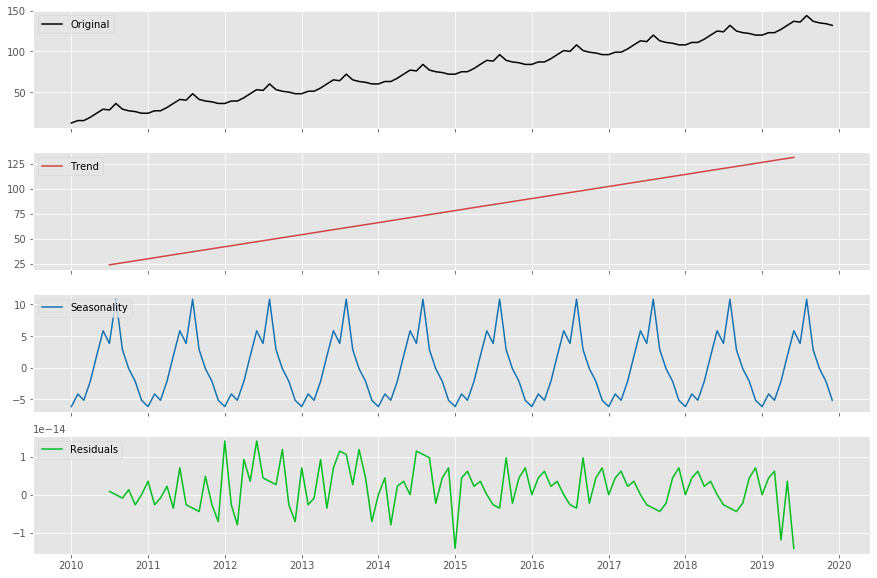

In [30]:
# إنشاء تصوير بياني للسلسلة الزمنية ومكوناتها الأساسية
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_aa, label='Original', c='#000000')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c='#D14444')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c='#1772B1')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c='#01BF21')
axes[3].legend(loc='upper left');

#### `2- Additive trend and multiplicative seasonality time series`

* إنشاء سلسلة زمنية ذات اتجاه جمعي وموسمية ضربية


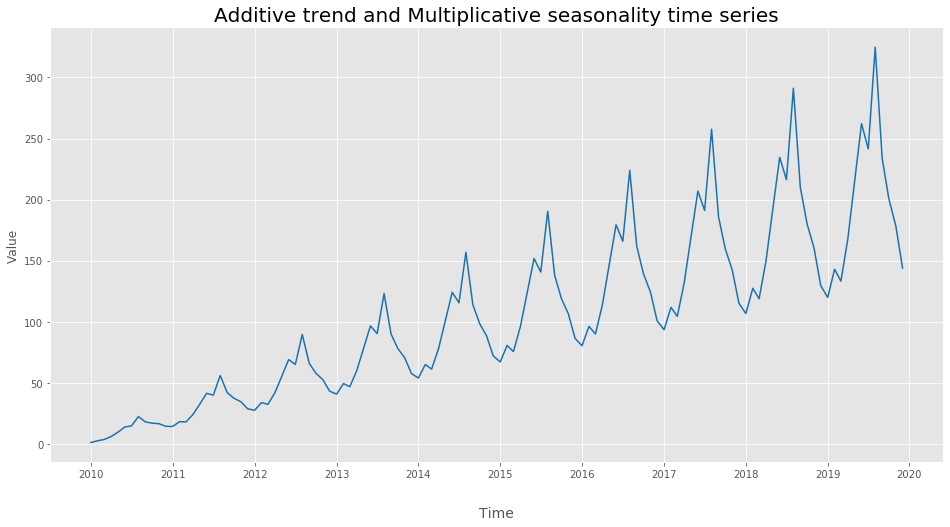

In [31]:
# إنشاء 120 نقطة (تمثل 10 * 12 شهر) أو 10 سنوات
xs = np.arange(1, 121)

# (عدد الحدود = 12) حدود تستخدم لإضافة تأثير الموسمية الضربية
seasonal_multipliers = [1.1, 1.3, 1.2, 1.5, 1.9, 2.3, 2.1, 2.8, 2.0, 1.7, 1.5, 1.2]

# قيم السلسلة الزمنية
time_series = []

# تقسيم الـ 120 نقطة إلى 10 مجموعات كل مجموعة تشكل سنة
for chunk in np.split(xs, 10):
    for i, val in enumerate(chunk):
        # ضرب قيمة الاتجاه في قيمة الموسمية
        time_series.append(val * seasonal_multipliers[i])
        
# dataframe تحويل المعطيات إلى إطار بيانات 
df_am = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)


# الرسم البياني للسلسلة الزمنية
fig, ax = plt.subplots(figsize=(16,8))
ax.set_title('Additive trend and Multiplicative seasonality time series', size=20)
ax.set_xlabel("Time", size=14)
ax.xaxis.set_label_coords(0.5, -.1)
ax.set_ylabel("Value")
ax.plot(df_am, c='#1772B1');

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# تحليل السلسلة الزمنية إلى كل من الاتجاه والموسمية والبواقي
ss_decomposition = seasonal_decompose(df_am, model='multiplicative', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

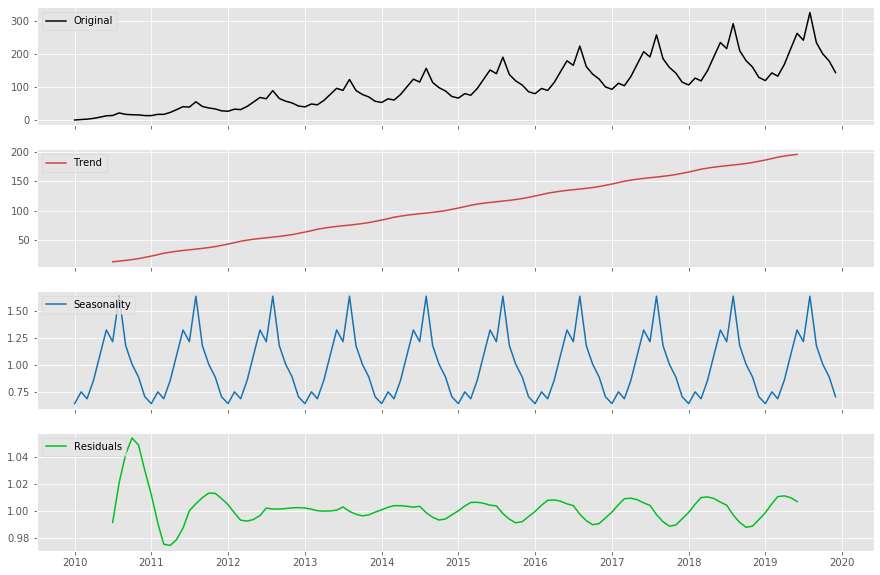

In [34]:
# إنشاء تصوير بياني للسلسلة الزمنية ومكوناتها الأساسية
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_am, label='Original', c='#000000')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c='#D14444')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c='#1772B1')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c='#01BF21')
axes[3].legend(loc='upper left');

#### `3-  Multiplicative trend and additive seasonality time series`

* إنشاء سلسلة زمنية ذات اتجاه ضربي وموسمية جمعية


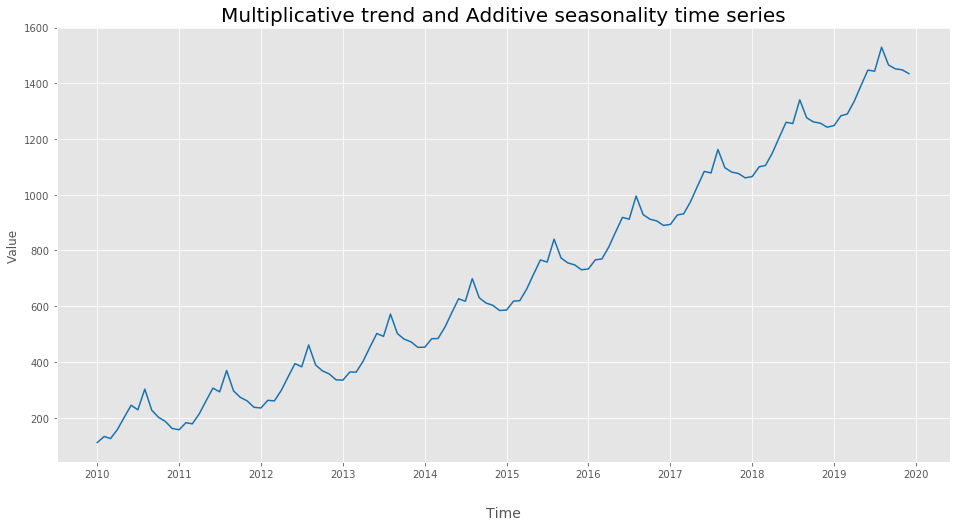

In [35]:
# إنشاء 120 نقطة (تمثل 10 * 12 شهر) أو 10 سنوات
x_range = np.arange(1, 121)
#  سنقوم برفع كل قيمة في إلى القوى 1.5 لجعل الاتجاه ضربي (نمو أسي غير خطي)
x_range = np.array([x**1.5 for x in xs])

#  حدود تستخدم لإضافة تأثير الموسميةالجمعية
seasonal_adders = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]

time_series = []
# تقسيم الـ 120 نقطة إلى 10 مجموعات كل مجموعة تشكل سنة
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # إضافة قيمة الاتجاه إلى قيمة الموسمية
        time_series.append(val + seasonal_adders[i])


# dataframe تحويل المعطيات إلى إطار بيانات 
df_ma = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# الرسم البياني للسلسلة الزمنية
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Multiplicative trend and Additive seasonality time series', size=20)
ax.set_xlabel("Time", size=14)
ax.xaxis.set_label_coords(0.5, -.1)
ax.set_ylabel("Value")
ax.plot(df_ma, c='#1772B1');

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

# تحليل السلسلة الزمنية إلى كل من الاتجاه والموسمية والبواقي
ss_decomposition = seasonal_decompose(df_ma, model='additive', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

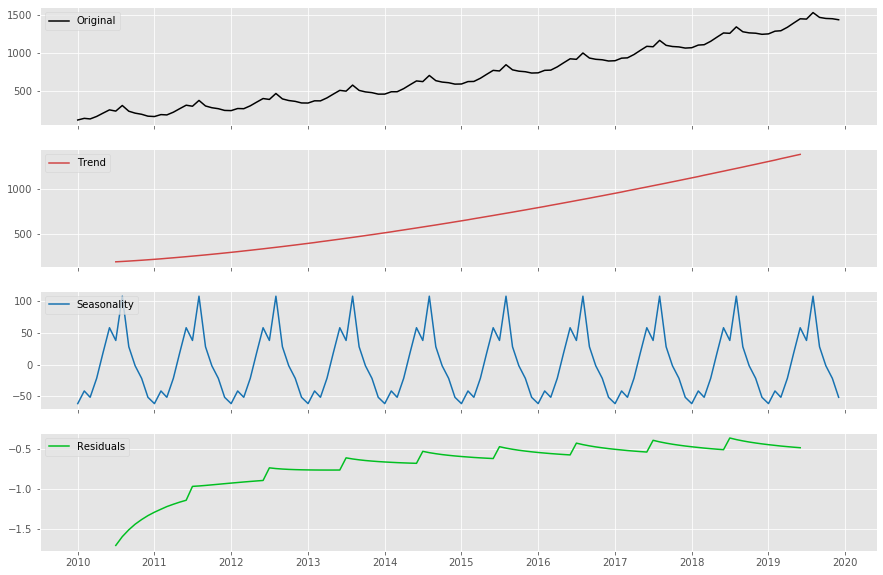

In [37]:
# إنشاء تصوير بياني للسلسلة الزمنية ومكوناتها الأساسية
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(df_ma, label='Original', c='#000000')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c='#D14444')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c='#1772B1')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c='#01BF21')
axes[3].legend(loc='upper left');

#### `4-  Multiplicative trend and multiplicative seasonality time series`

* إنشاء سلسلة زمنية ذات اتجاه ضربي وموسمية ضربية


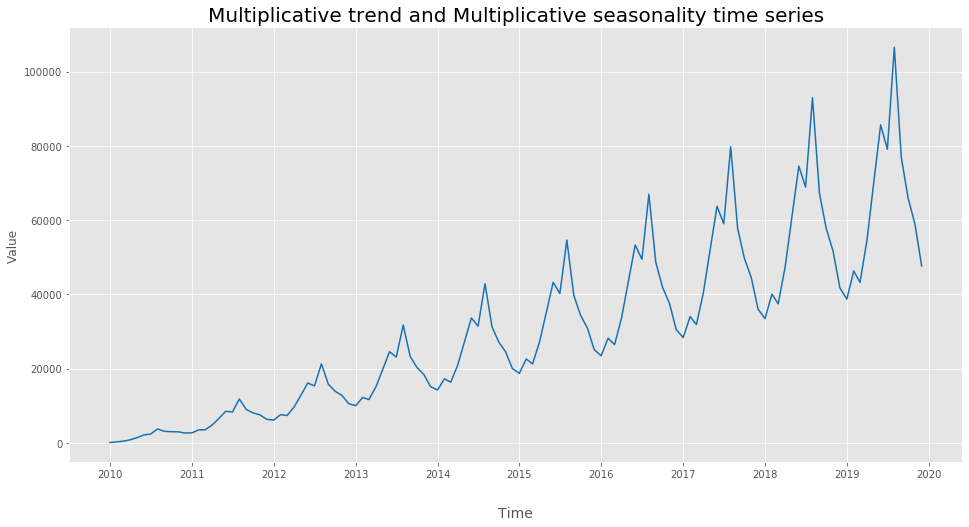

In [39]:
# إنشاء 120 نقطة (تمثل 10 * 12 شهر) أو 10 سنوات
x_range = np.arange(1, 121)

#  سنقوم برفع كل قيمة في إلى القوى 1.25 لجعل الاتجاه ضربي (نمو أسي غير خطي)
x_range = np.array([x**1.25 for x in xs])

#  حدود تستخدم لإضافة تأثير الموسميةالضربية
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]

time_series = []
# تقسيم الـ 120 نقطة إلى 10 مجموعات كل مجموعة تشكل سنة
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # ضرب قيم الاتجاه في قيم الموسمية
        time_series.append(val * seasonal_multipliers[i])
        
# الرسم البياني للسلسلة الزمنية
df_mm = pd.DataFrame(
    data={'y': time_series}, 
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# الرسم البياني للسلسلة الزمنية
fig, ax = plt.subplots(figsize=(16,8))
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
ax.set_xlabel("Time", size=14)
ax.xaxis.set_label_coords(0.5, -.1)
ax.set_ylabel("Value")
ax.plot(df_mm, c='#1772B1');

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

# تحليل السلسلة الزمنية إلى كل من الاتجاه والموسمية والبواقي
ss_decomposition = seasonal_decompose(df_mm, model='multiplicative', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

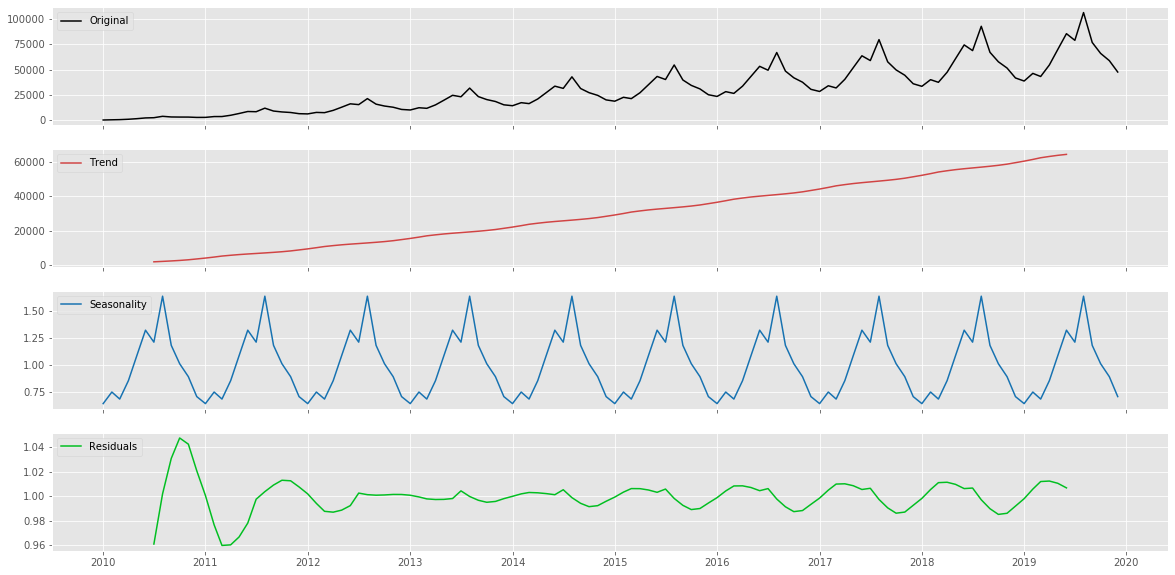

In [41]:
# إنشاء تصوير بياني للسلسلة الزمنية ومكوناتها الأساسية
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

axes[0].plot(df_mm, label='Original', c='#000000')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c='#D14444')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c='#1772B1')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c='#01BF21')
axes[3].legend(loc='upper left');